<a href="https://www.kaggle.com/code/sohaelshafey/employees-satisfaction-eda?scriptVersionId=157590971" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/capgemini-employee-reviews-dataset/Capgemini_Employee_Reviews_from_AmbitionBox.csv


# Load Data

In [2]:
df =pd.read_csv('/kaggle/input/capgemini-employee-reviews-dataset/Capgemini_Employee_Reviews_from_AmbitionBox.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26993 entries, 0 to 26992
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                25912 non-null  object 
 1   Place                24597 non-null  object 
 2   Job_type             11556 non-null  object 
 3   Department           22083 non-null  object 
 4   Date                 25915 non-null  object 
 5   Overall_rating       25898 non-null  float64
 6   work_life_balance    26977 non-null  float64
 7   skill_development    26976 non-null  float64
 8   salary_and_benefits  26947 non-null  float64
 9   job_security         26943 non-null  float64
 10  career_growth        26931 non-null  float64
 11  work_satisfaction    26909 non-null  float64
 12  Likes                23864 non-null  object 
 13  Dislikes             22966 non-null  object 
dtypes: float64(7), object(7)
memory usage: 2.9+ MB


# EDA & Outliers Analysis

In [3]:
df['work_satisfaction'].value_counts()

work_satisfaction
3.0    6931
4.0    6358
5.0    5459
1.0    4492
2.0    3669
Name: count, dtype: int64

In [4]:
for x in ['Title', 'Place', 'Job_type', 'Department']:
    print(x,df[x].value_counts())

Title Title
Associate Consultant                         3013
Consultant                                   2980
Senior Consultant                            2325
Process Associate                            1346
Senior Software Engineer                     1142
                                             ... 
Data Entry Operater    (working remotely)       1
.net Software Developer                         1
Talent                                          1
Senior Consultant Windows                       1
Hr Generalist                                   1
Name: count, Length: 4239, dtype: int64
Place Place
Bangalore                       2977
Pune                            2890
Bengaluru/Bangalore             2161
Mumbai                          1950
Chennai                         1256
                                ... 
Mississauga                        1
Thane, Mumbai                      1
Mumbaj                             1
Coimbatore Chennai Bangalore       1
Noda            

In [5]:
def get_outliers(col,threshold):
    category_counts = df[col].value_counts()

    # Set a threshold for low frequency
    uncommon_categories = category_counts[category_counts < threshold].index.tolist()

    # Identify rows with uncommon categories
    outliers = df[df[col].isin(uncommon_categories)]
    print("Column=",col)
    print("unique values=",len(df[col].value_counts()))
    print("Threshold=",threshold)
    print("outliers=",len(outliers))
    print("all=",len(df[col]))
    print("outlier percentages=",round(len(outliers)/len(df[col]),2) * 100 ,"%")
    print("-------------------------")
    
for x in ['Title', 'Place', 'Job_type', 'Department']:
    get_outliers(x,10)

Column= Title
unique values= 4239
Threshold= 10
outliers= 5934
all= 26993
outlier percentages= 22.0 %
-------------------------
Column= Place
unique values= 830
Threshold= 10
outliers= 1163
all= 26993
outlier percentages= 4.0 %
-------------------------
Column= Job_type
unique values= 5
Threshold= 10
outliers= 1
all= 26993
outlier percentages= 0.0 %
-------------------------
Column= Department
unique values= 619
Threshold= 10
outliers= 917
all= 26993
outlier percentages= 3.0 %
-------------------------


# Pie Charts

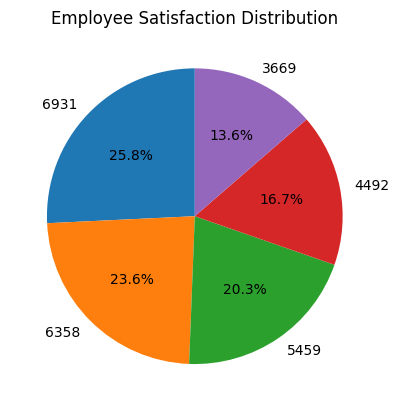

In [6]:
plt.pie(df['work_satisfaction'].value_counts(), labels=df['work_satisfaction'].value_counts(), autopct='%1.1f%%', startangle=90)
plt.title('Employee Satisfaction Distribution')
plt.show()

<Axes: xlabel='work_satisfaction'>

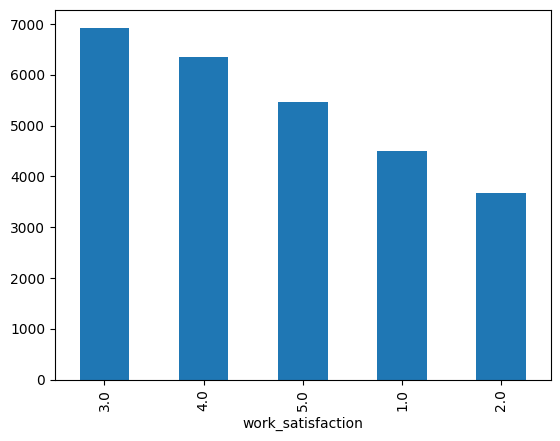

In [7]:
df['work_satisfaction'].value_counts().plot.bar()

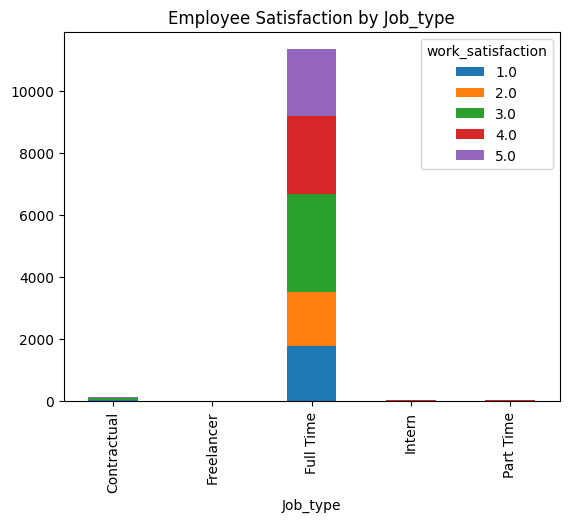

In [8]:
pd.crosstab(df['Job_type'], df['work_satisfaction']).plot(kind='bar', stacked=True)
plt.title('Employee Satisfaction by Job_type')
plt.show()

In [9]:
#job_type to codes
df["Job_type_cat"]=pd.CategoricalIndex(df["Job_type"]).codes

# Numerical Data

In [10]:
len(df.columns)

15

In [11]:
df.describe()

,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Job_type_cat
count,25898.000000,26977.000000,26976.000000,26947.000000,26943.000000,26931.000000,26909.000000,26993.000000
mean,3.707236,3.662379,3.636084,3.037444,3.782541,3.628458,3.171801,0.278924
std,1.257180,1.287039,1.270036,1.337186,1.269125,1.329579,1.349958,1.487014
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000
25%,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,-1.000000
50%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,-1.000000
75%,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [12]:
for x in ['Overall_rating','work_life_balance','skill_development','salary_and_benefits','Job_type_cat','job_security','career_growth','work_satisfaction']:
    print(x,df[x].value_counts())
    print("--------------------")

Overall_rating Overall_rating
4.0    8465
5.0    8369
3.0    4705
1.0    2528
2.0    1831
Name: count, dtype: int64
--------------------
work_life_balance work_life_balance
5.0    8656
4.0    8358
3.0    5031
1.0    2869
2.0    2063
Name: count, dtype: int64
--------------------
skill_development skill_development
4.0    8333
5.0    8267
3.0    5326
1.0    2658
2.0    2392
Name: count, dtype: int64
--------------------
salary_and_benefits salary_and_benefits
3.0    7459
4.0    5603
1.0    4860
5.0    4717
2.0    4308
Name: count, dtype: int64
--------------------
Job_type_cat Job_type_cat
-1    15437
 2    11340
 0      131
 3       51
 4       33
 1        1
Name: count, dtype: int64
--------------------
job_security job_security
5.0    9659
4.0    8768
3.0    4258
1.0    2744
2.0    1514
Name: count, dtype: int64
--------------------
career_growth career_growth
5.0    8822
4.0    7901
3.0    4805
1.0    3217
2.0    2186
Name: count, dtype: int64
--------------------
work_satisfaction

# HeatMap

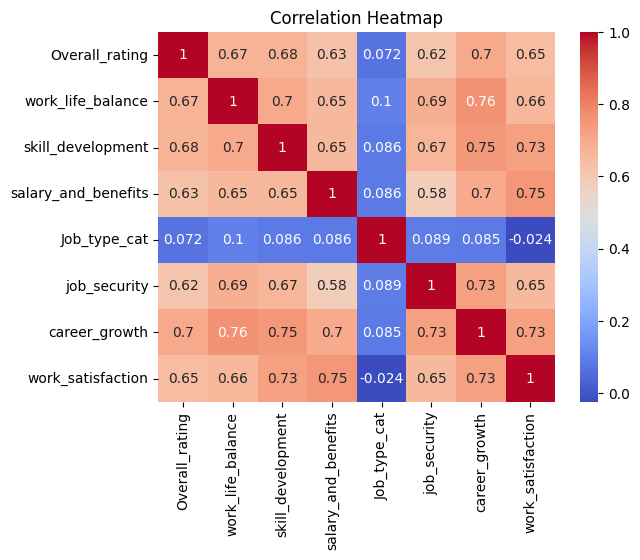

In [13]:
sns.heatmap(df[['Overall_rating','work_life_balance','skill_development','salary_and_benefits','Job_type_cat','job_security','career_growth','work_satisfaction']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# PairPlot

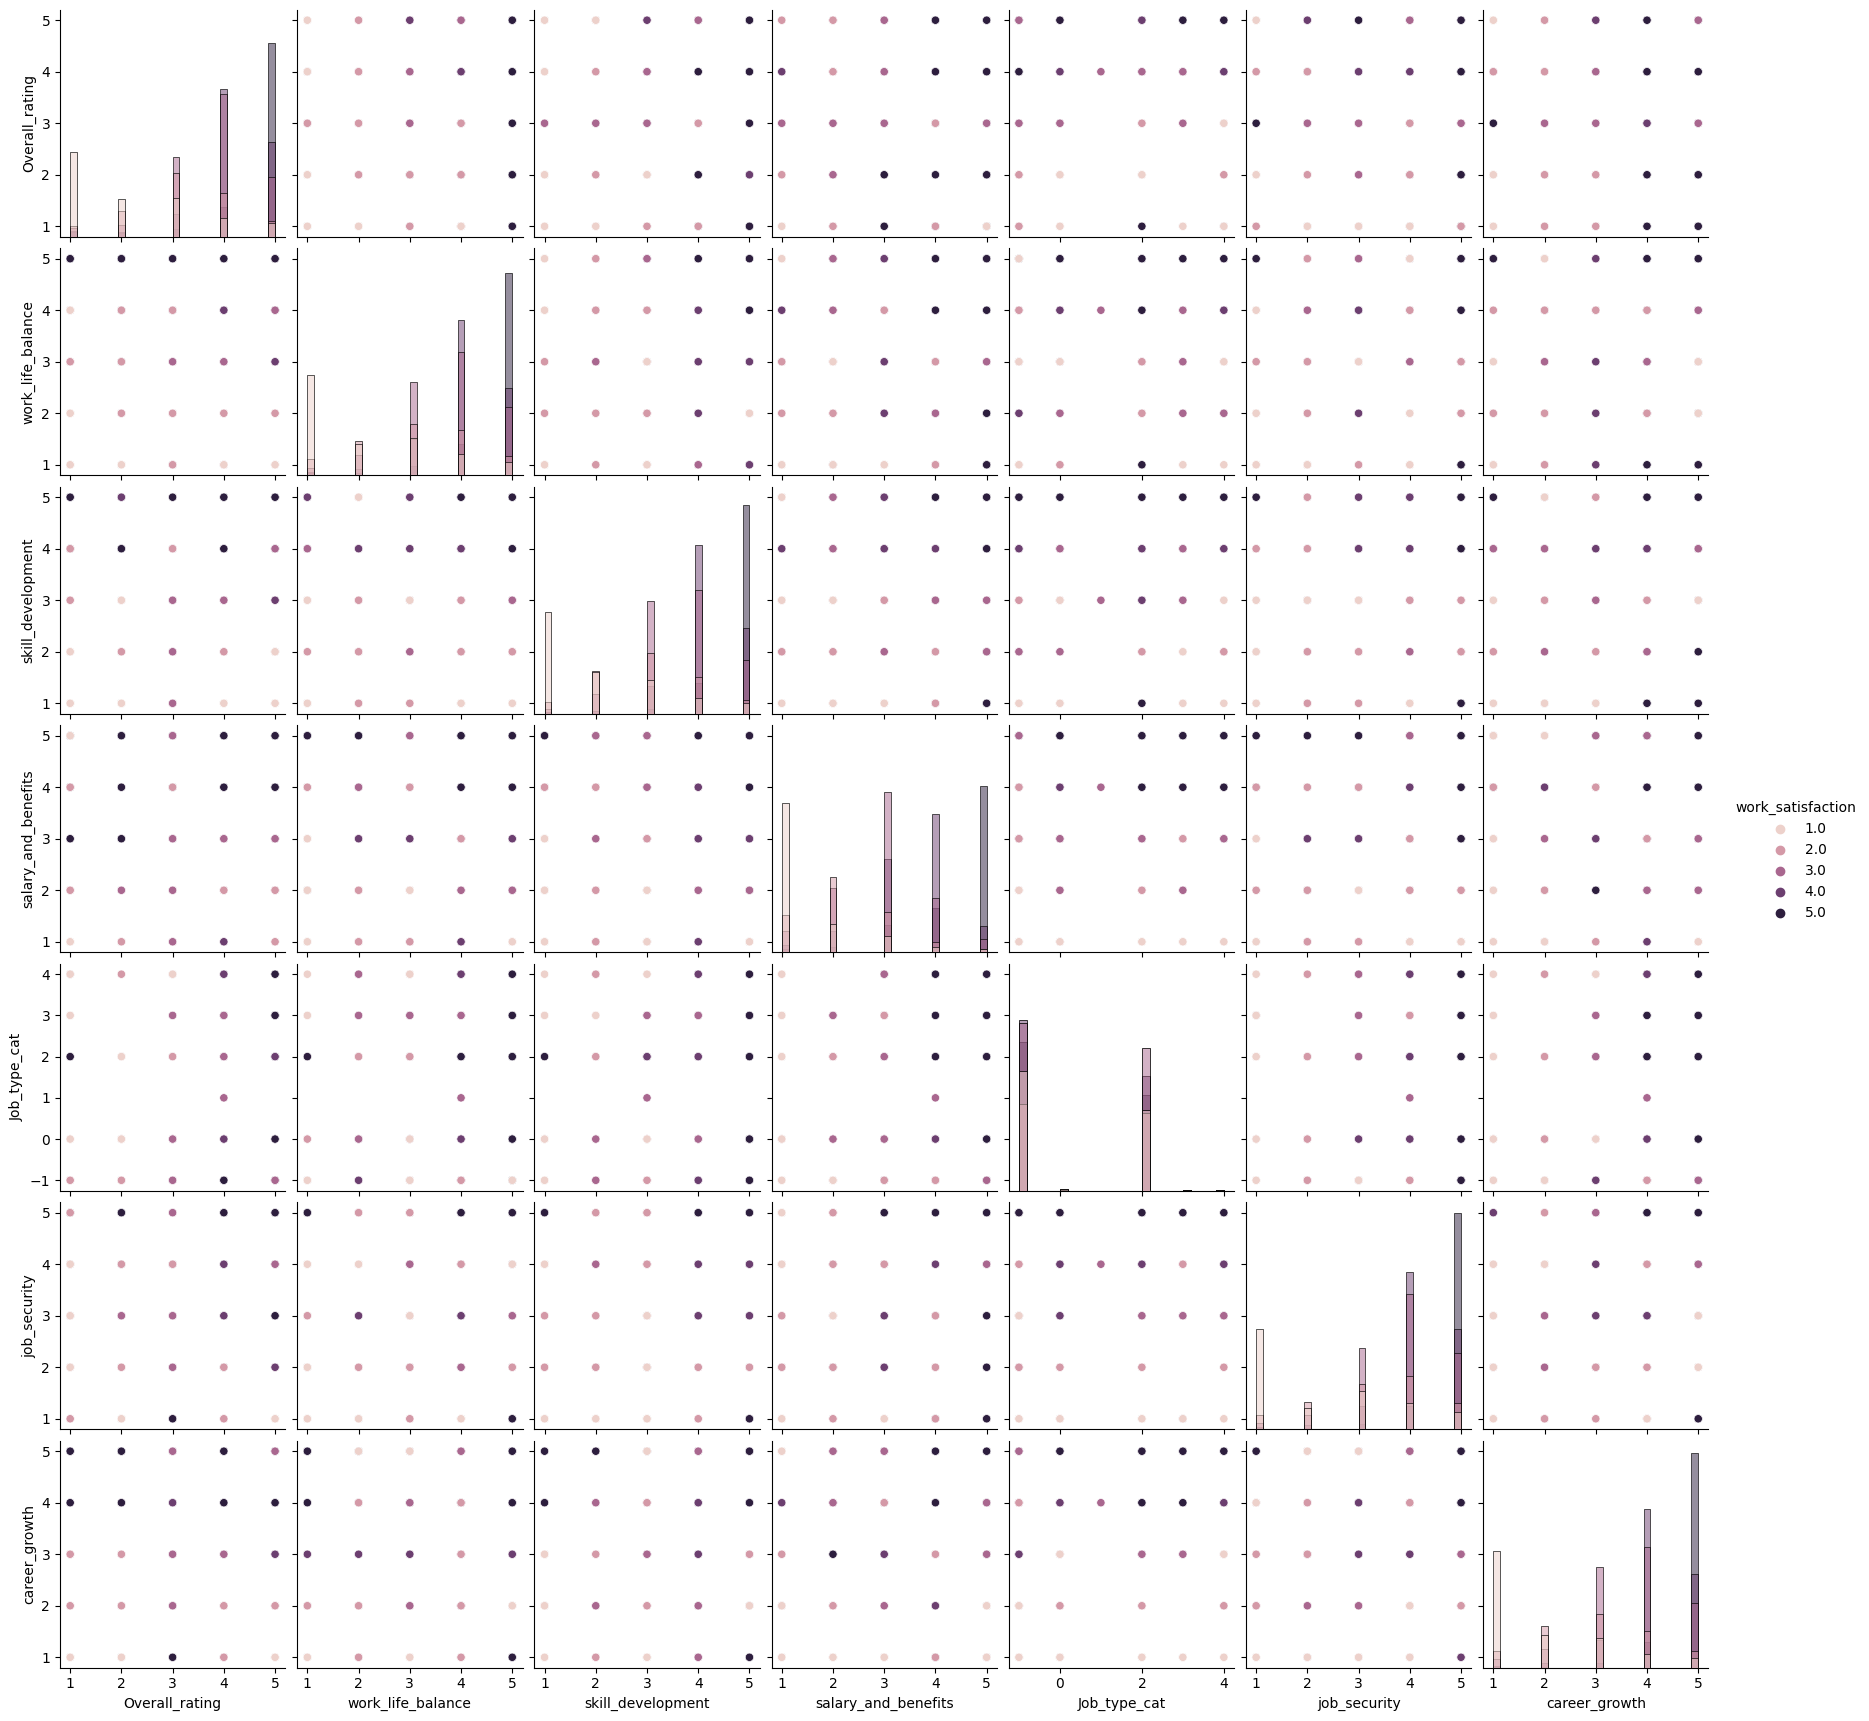

In [14]:
sns.pairplot(df[['Overall_rating','work_life_balance','skill_development','salary_and_benefits','Job_type_cat','job_security','career_growth','work_satisfaction']],hue='work_satisfaction',diag_kind="hist")

# Boxplot

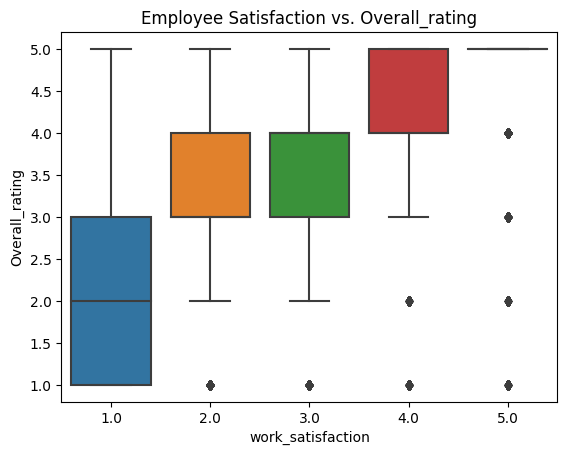

In [15]:
sns.boxplot(x='work_satisfaction', y='Overall_rating', data=df)
plt.title('Employee Satisfaction vs. Overall_rating')
plt.show()

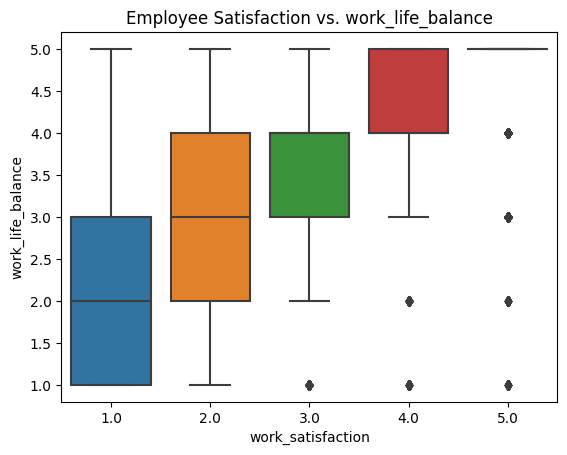

In [16]:
sns.boxplot(x='work_satisfaction', y='work_life_balance', data=df)
plt.title('Employee Satisfaction vs. work_life_balance')
plt.show()

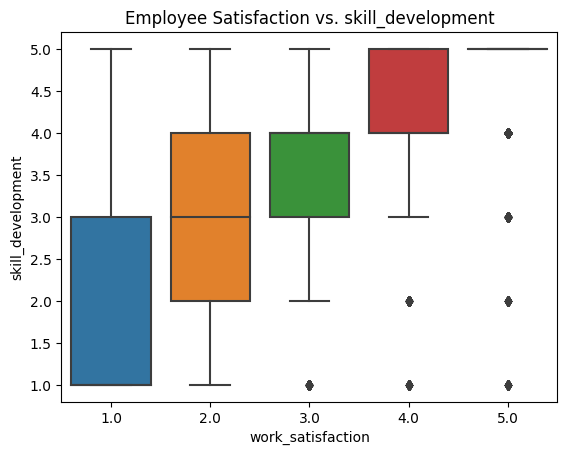

In [17]:
sns.boxplot(x='work_satisfaction', y='skill_development', data=df)
plt.title('Employee Satisfaction vs. skill_development')
plt.show()

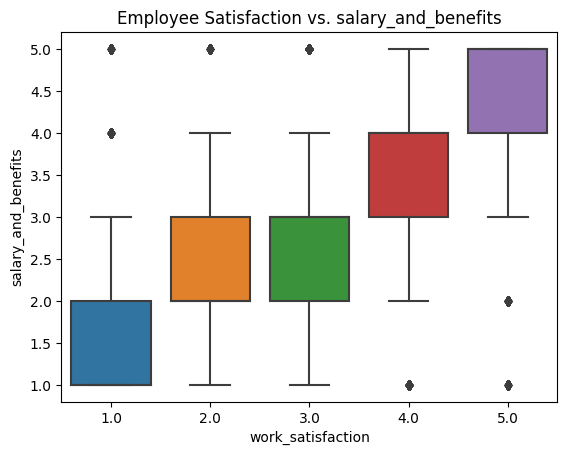

In [18]:
sns.boxplot(x='work_satisfaction', y='salary_and_benefits', data=df)
plt.title('Employee Satisfaction vs. salary_and_benefits')
plt.show()

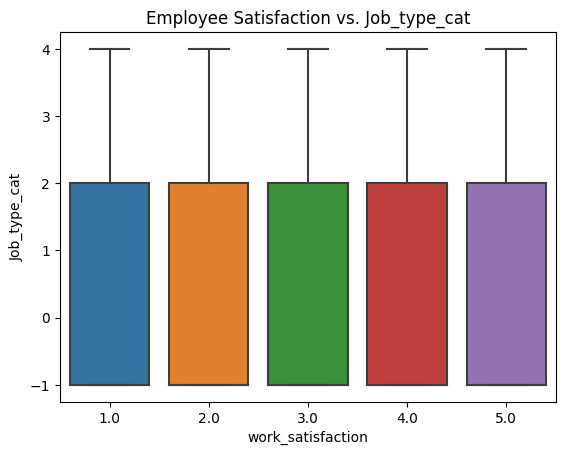

In [19]:
sns.boxplot(x='work_satisfaction', y='Job_type_cat', data=df)
plt.title('Employee Satisfaction vs. Job_type_cat')
plt.show()

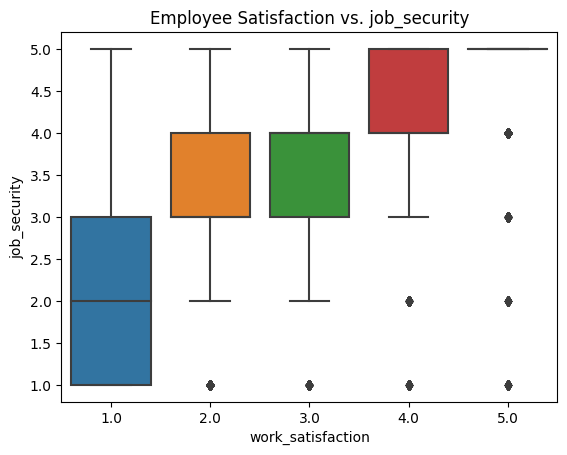

In [20]:
sns.boxplot(x='work_satisfaction', y='job_security', data=df)
plt.title('Employee Satisfaction vs. job_security')
plt.show()

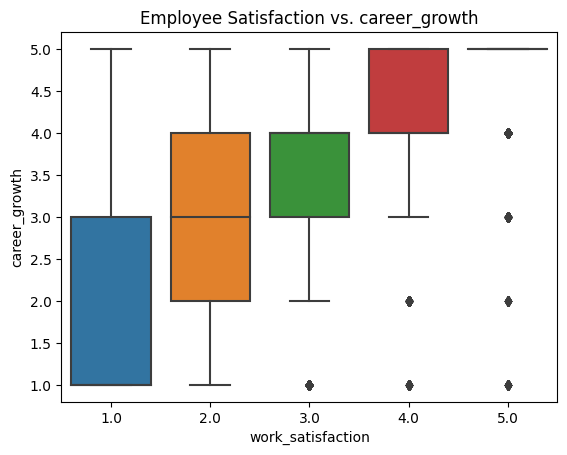

In [21]:
sns.boxplot(x='work_satisfaction', y='career_growth', data=df)
plt.title('Employee Satisfaction vs. career_growth')
plt.show()

# Word Cloud for likes and dislikes in work satisfaction

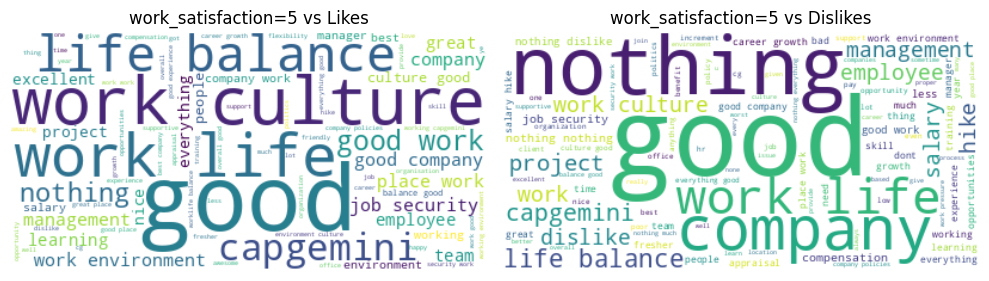

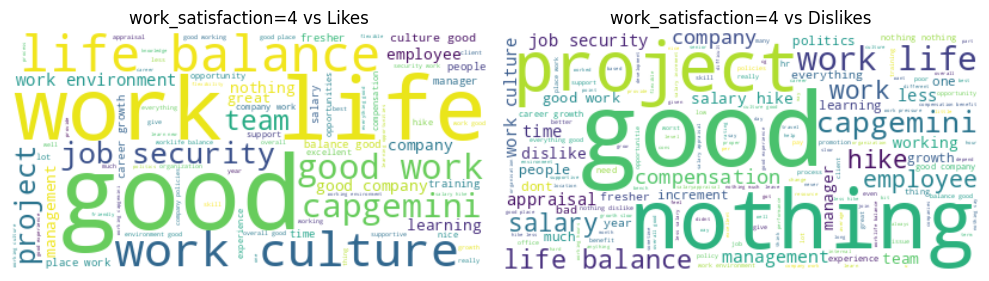

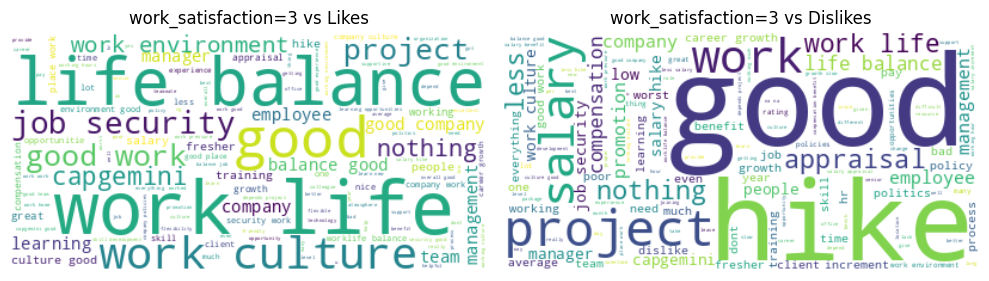

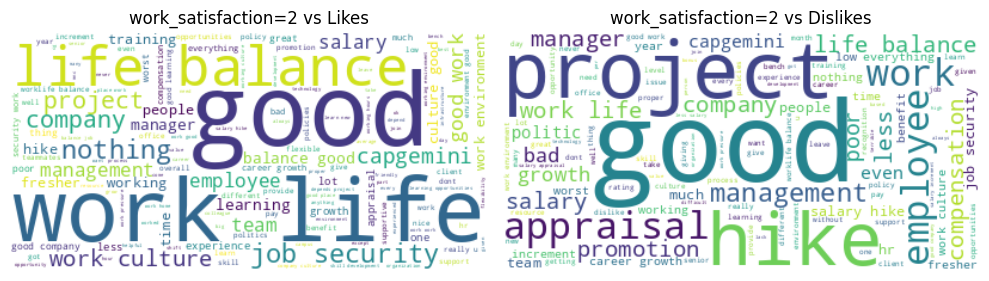

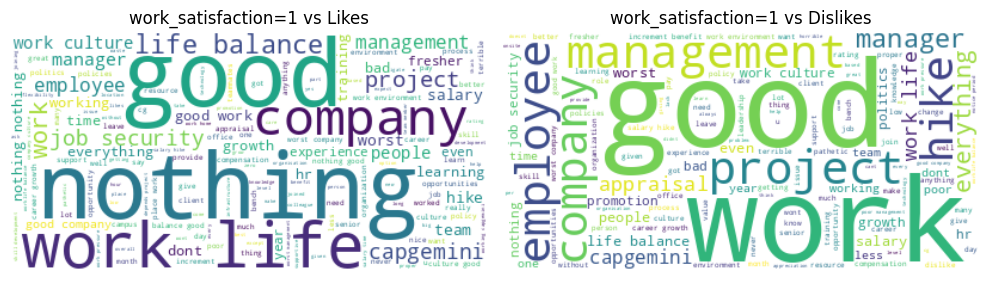

In [22]:
comments = [' '.join(str(x) for x in (df[df["work_satisfaction"]==5]["Likes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==5]["Dislikes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==4]["Likes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==4]["Dislikes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==3]["Likes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==3]["Dislikes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==2]["Likes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==2]["Dislikes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==1]["Likes"].dropna())),
           ' '.join(str(x) for x in (df[df["work_satisfaction"]==1]["Dislikes"].dropna()))]
titles = ['work_satisfaction=5 vs Likes',
          'work_satisfaction=5 vs Dislikes',
          'work_satisfaction=4 vs Likes',
          'work_satisfaction=4 vs Dislikes',
          'work_satisfaction=3 vs Likes',
          'work_satisfaction=3 vs Dislikes',
          'work_satisfaction=2 vs Likes',
          'work_satisfaction=2 vs Dislikes',
          'work_satisfaction=1 vs Likes',
          'work_satisfaction=1 vs Dislikes']
# Text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Create WordCloud objects
wordclouds = [WordCloud(width=400, height=200, background_color='white').generate(preprocess_text(comment)) for comment in comments]

# Set the rotation step
n = 2
z=0
# Display word clouds in pairs for every n index
for i in range(0, len(wordclouds), n):
    # Create subplots for each pair
    fig, axes = plt.subplots(1, n, figsize=(10, 5))

    # Display word clouds for the current pair
    for j in range(n):
        idx = i + j
        if idx < len(wordclouds):
            axes[j].imshow(wordclouds[idx], interpolation='bilinear')
            axes[j].axis('off')
            axes[j].set_title(titles[z])
            z = z +1
    

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()